In [1]:
# Import necessary libraries - common libraries include pandas, numpy, matplotlib, and sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import scipy.stats
from scipy.stats import dgamma
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [4]:
# Read in the Carbon West data file
spy = pd.read_csv('spy_Original.csv')

# View the first few rows of the dataset
spy.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1/29/1993,24.701669,24.701669,24.578775,24.684113,1003200,29,4,4,1,1993
1,2/1/1993,24.701643,24.859650,24.701643,24.859650,480500,1,0,5,2,1993
2,2/2/1993,24.842113,24.929895,24.789444,24.912338,201300,2,1,5,2,1993
3,2/3/1993,24.947451,25.193238,24.929894,25.175682,529400,3,2,5,2,1993
4,2/4/1993,25.263461,25.333686,24.982561,25.281017,531500,4,3,5,2,1993


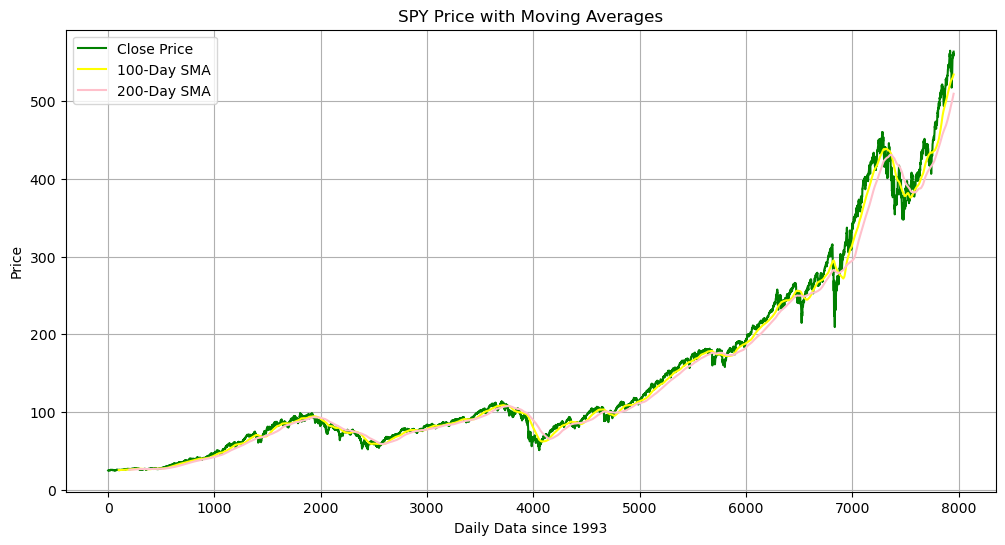

In [6]:
# Calculate the moving average
spy['SMA_100'] = spy['Close'].rolling(window=100).mean()
spy['SMA_200'] = spy['Close'].rolling(window=200).mean()

# plot spy performance since 2014
plt.figure(figsize=(12, 6))
plt.plot(spy['Close'], label='Close Price', color='green')
plt.plot(spy['SMA_100'], label='100-Day SMA', color='yellow')
plt.plot(spy['SMA_200'], label='200-Day SMA', color='pink')
plt.title('SPY Price with Moving Averages')
plt.xlabel('Daily Data since 1993')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

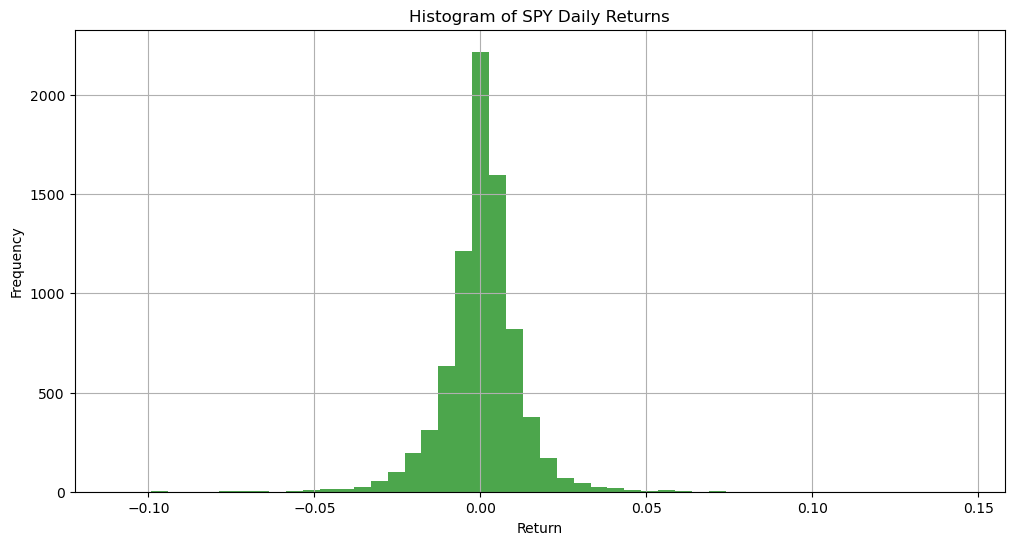

In [7]:
# plot distribution of returns
spy['Returns'] = spy['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.hist(spy['Returns'].dropna(), bins=50, color='green', alpha=0.7)
plt.title('Histogram of SPY Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()

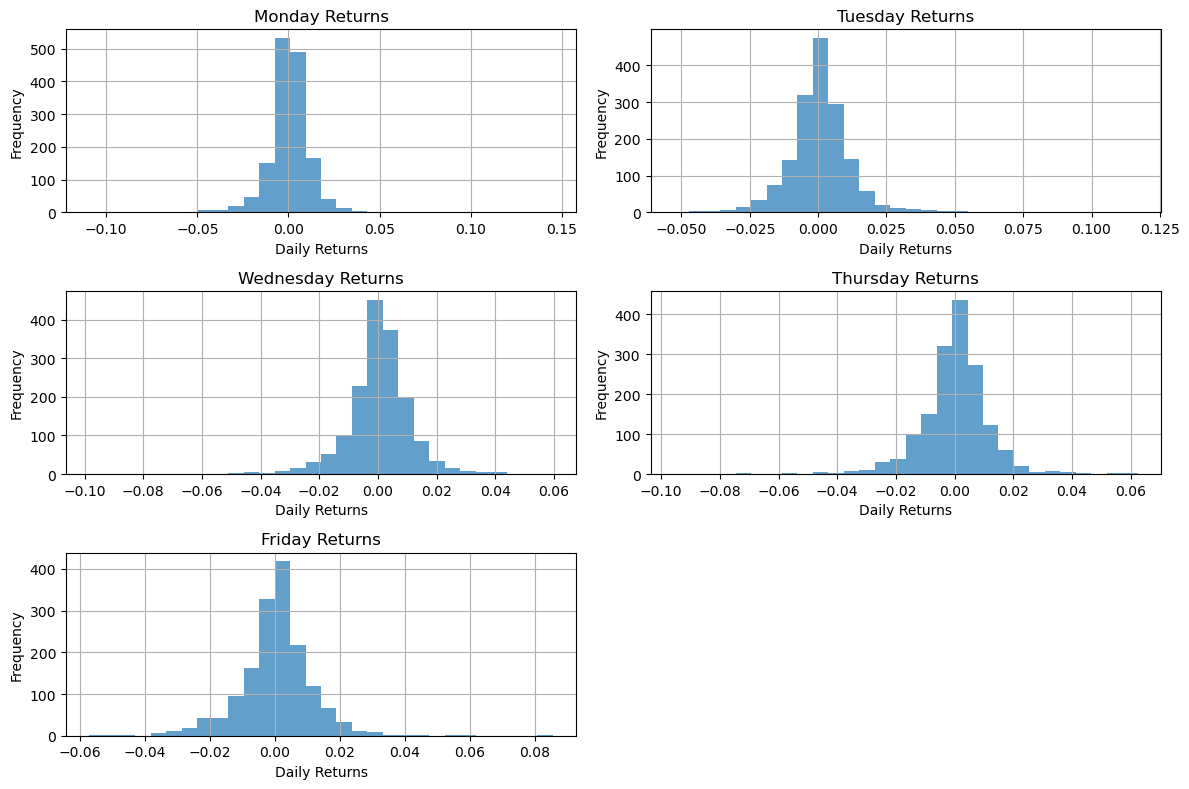

In [8]:
# Step 1: Calculate daily returns (if not already calculated)
spy['Daily_Returns'] = spy['Close'].pct_change()

# Step 2: Plot histograms for each day of the week using the existing 'Weekday' column (0 to 5)
# 0 = Monday, 5 = Friday
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

plt.figure(figsize=(12, 8))
for i, day in enumerate(days):
    plt.subplot(3, 2, i+1)  # Create a subplot for each day
    spy[spy['Weekday'] == i]['Daily_Returns'].hist(bins=30, alpha=0.7)
    plt.title(f'{day} Returns')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

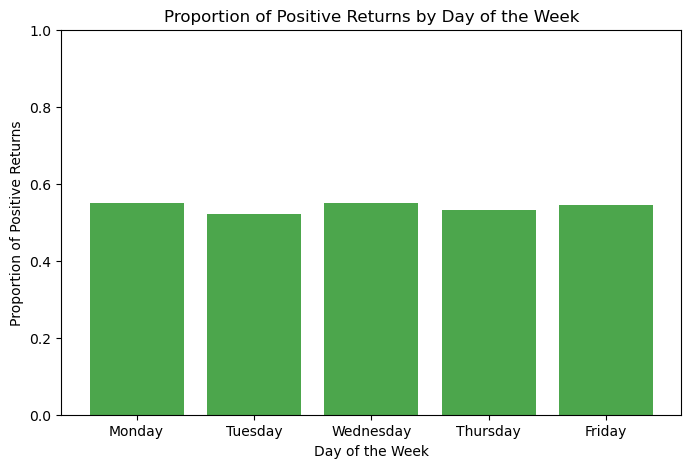

In [9]:
# Step 1: Calculate daily returns (if not already calculated)
spy['Daily_Returns'] = spy['Close'].pct_change()

# Step 2: Categorize returns as positive (1) or negative (0)
spy['Positive_Return'] = spy['Daily_Returns'] > 0

# Step 3: Calculate the proportion of positive returns for each day of the week using the existing 'Weekday' column
proportion_positive = spy.groupby('Weekday')['Positive_Return'].mean()

# Step 4: Plot the proportions
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

plt.figure(figsize=(8, 5))
plt.bar(days, proportion_positive, color='green', alpha=0.7)
plt.title('Proportion of Positive Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of Positive Returns')
plt.ylim(0, 1)  # Proportions are between 0 and 1
plt.show()

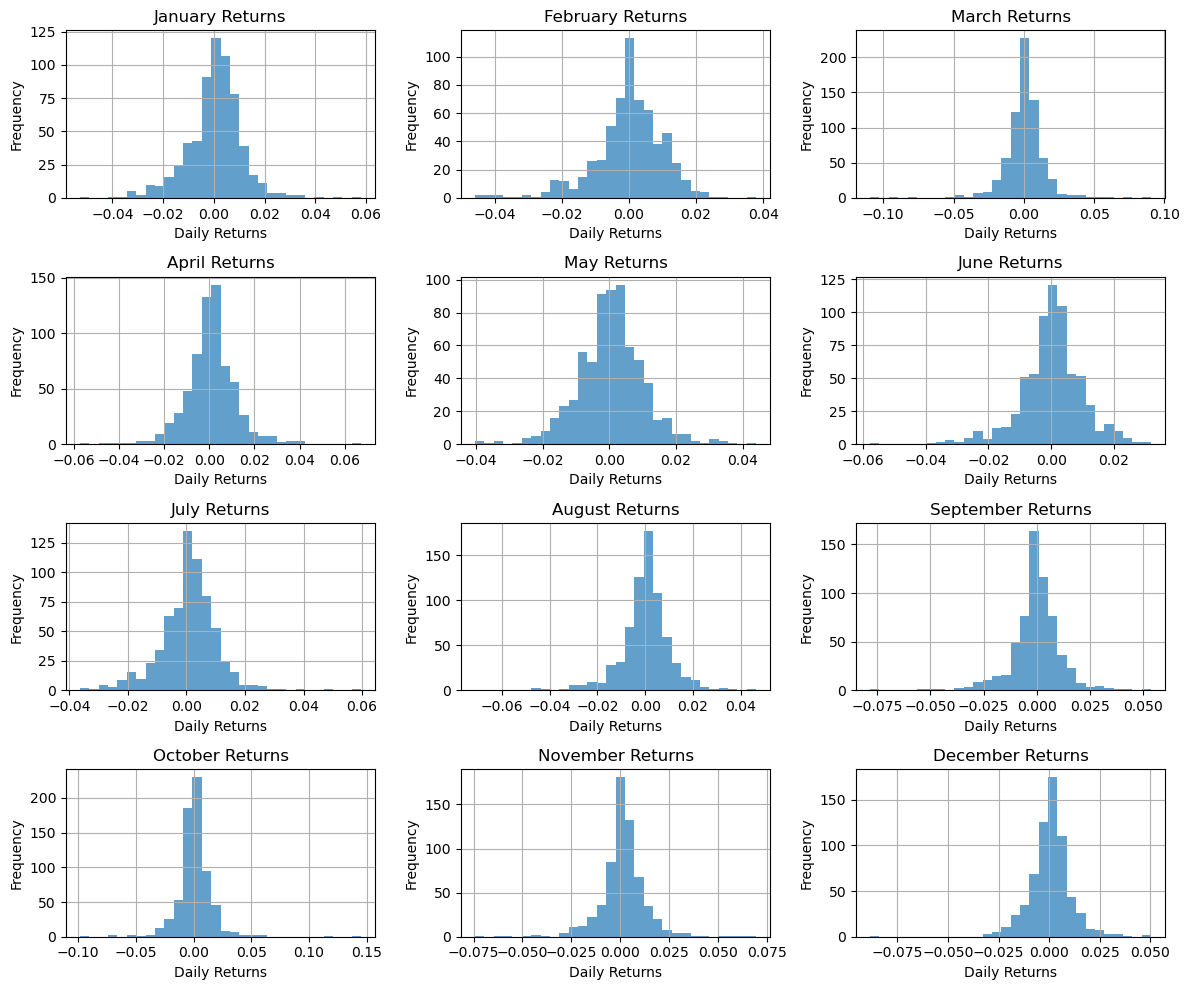

In [10]:
# Step 1: Calculate daily returns
spy['Daily_Returns'] = spy['Close'].pct_change()

# Step 3: Plot histograms of daily returns by month
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 10))
for i, month in enumerate(months):
    plt.subplot(4, 3, i+1)  # Create a subplot for each month
    spy[spy['Month'] == (i+1)]['Daily_Returns'].hist(bins=30, alpha=0.7)
    plt.title(f'{month} Returns')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

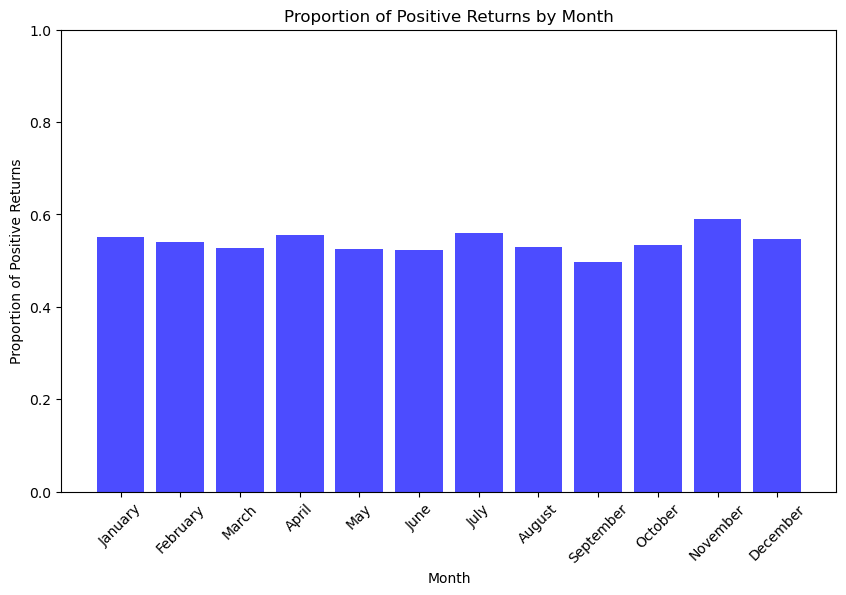

In [11]:
# Step 4: Categorize returns as positive (1) or negative (0)
spy['Positive_Return'] = spy['Daily_Returns'] > 0

# Step 5: Calculate the proportion of positive returns for each month
proportion_positive_month = spy.groupby('Month')['Positive_Return'].mean()

# Step 6: Plot the proportion of positive returns by month
plt.figure(figsize=(10, 6))
plt.bar(months, proportion_positive_month, color='blue', alpha=0.7)
plt.title('Proportion of Positive Returns by Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Positive Returns')
plt.ylim(0, 1)  # Proportions are between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

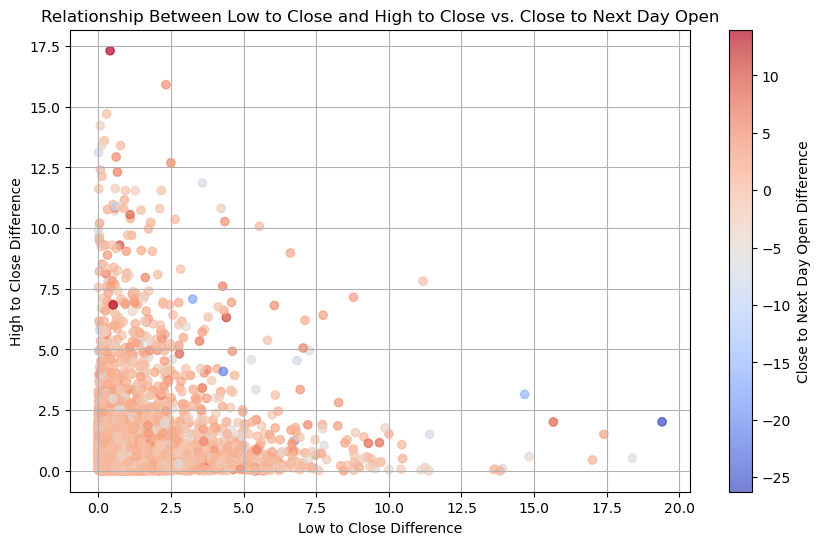

In [12]:
# Step 1: Calculate the necessary columns
spy['Low_to_Close'] = spy['Close'] - spy['Low']
spy['High_to_Close'] = spy['High'] - spy['Close']
spy['Close_to_Next_Open'] = spy['Open'].shift(-1) - spy['Close']  # Shift for the next day's open

# Step 2: Plot the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot where color is based on Close to Next Open difference
scatter = plt.scatter(spy['Low_to_Close'], spy['High_to_Close'], c=spy['Close_to_Next_Open'], cmap='coolwarm', alpha=0.7)

# Adding color bar
plt.colorbar(scatter, label='Close to Next Day Open Difference')

# Plot details
plt.title('Relationship Between Low to Close and High to Close vs. Close to Next Day Open')
plt.xlabel('Low to Close Difference')
plt.ylabel('High to Close Difference')
plt.grid(True)
plt.show()

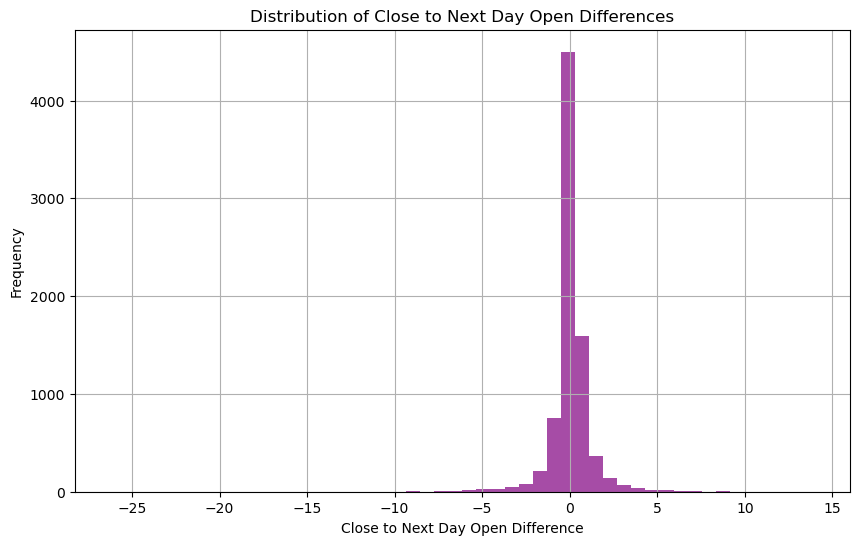

,Low_to_Close,High_to_Close,Close_to_Next_Open
Low_to_Close,1.000000,0.062688,-0.052105
High_to_Close,0.062688,1.000000,0.057320
Close_to_Next_Open,-0.052105,0.057320,1.000000


In [15]:
# Step 1: Correlation analysis
correlation_matrix = spy[['Low_to_Close', 'High_to_Close', 'Close_to_Next_Open']].corr()

# Step 2: Visualize the distribution of Close to Next Day Open differences
plt.figure(figsize=(10, 6))
plt.hist(spy['Close_to_Next_Open'].dropna(), bins=50, alpha=0.7, color='purple')
plt.title('Distribution of Close to Next Day Open Differences')
plt.xlabel('Close to Next Day Open Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Output the correlation matrix
correlation_matrix

In [16]:
# Step 1: Create columns for yesterday's high and low
spy['Yesterday_High'] = spy['High'].shift(1)
spy['Yesterday_Low'] = spy['Low'].shift(1)

# Step 2: Create conditions
condition_high = spy['High'] > spy['Yesterday_High']  # Today's high > yesterday's high
condition_low = spy['Low'] > spy['Yesterday_Low']     # Today's low > yesterday's low

# Step 3: Check if close is higher than open under both conditions
spy['Close_Higher_Than_Open'] = spy['Close'] > spy['Open']
condition_combined = condition_high & condition_low

# Step 4: Calculate the proportion of days where the close is higher than the open under these conditions
proportion = spy[condition_combined]['Close_Higher_Than_Open'].mean()

# Output the result
print(f"Proportion of days where Close is higher than Open when both High and Low are higher than yesterday: {proportion:.2%}")

Proportion of days where Close is higher than Open when both High and Low are higher than yesterday: 69.71%


In [17]:
# Step 1: Filter the dataset where both conditions (high > yesterday's high and low > yesterday's low) are true
valid_days = spy[condition_combined]

# Step 2: Count the number of days where the close price is higher than the open price
num_days = valid_days['Close_Higher_Than_Open'].sum()  # Sum the True values (True = 1, False = 0)

# Step 3: Count the total number of valid days where both conditions (high and low higher than previous day) are true
total_valid_days = valid_days.shape[0]

# Step 4: Calculate the success rate
success_rate = num_days / total_valid_days * 100

# Output the results
num_days, total_valid_days, success_rate

(2440, 3500, 69.71428571428572)

In [18]:
# Calculate the total number of days in the dataset
total_days_in_dataset = spy.shape[0]

# Output the total number of days
total_days_in_dataset

7954

In [19]:
# calculate how often higher highs and higher lows occur
scenario_1 = total_valid_days / total_days_in_dataset
print(scenario_1)

0.44003017349761125


In [20]:
# Step 1: Shift the condition_combined to create a condition for the previous day's close
condition_combined_shifted = condition_combined.shift(1)

# Step 2: Check if SPY closes higher than open on the next day when the previous day's condition was met
next_day_higher_close = spy['Close_Higher_Than_Open'] & condition_combined_shifted

# Step 3: Calculate the proportion of days where SPY closes higher than open on the next day
next_day_proportion = next_day_higher_close.mean()

# Output the result
next_day_proportion

0.22957002765903947

In [21]:
# Step 1: Check if both conditions are met and SPY closes higher than open
spy['Both_Conditions_Met'] = condition_combined & spy['Close_Higher_Than_Open']

# Step 2: Create a condition where the next day's open is higher than today's close
next_day_open_higher = spy['Open'].shift(-1) > spy['Close']

# Step 3: Combine the condition with "Both_Conditions_Met"
next_day_open_higher_with_conditions = next_day_open_higher & spy['Both_Conditions_Met'].shift(1)

# Step 4: Check if the next day closes lower than the next day's open
next_day_close_lower_than_high = spy['Close'].shift(-1) < spy['Open'].shift(-1)

# Step 5: Calculate the proportion of days where the next day closes lower than the next day's high
next_day_proportion_lower_than_high = (next_day_close_lower_than_high & next_day_open_higher_with_conditions).mean()

# Output the result
next_day_proportion_lower_than_high

0.08096555192356047

In [23]:
# of the 3500 days where spy closes higher given the conditions, spy opens higher than close this number of days
# Step 1: Create a condition where the next day's open is higher than today's close
next_day_open_higher = spy['Open'].shift(-1) > spy['Close']

# Step 2: Filter for the 2440 days where SPY closes higher than open under the conditions
valid_days_higher_close = valid_days[valid_days['Close_Higher_Than_Open']]

# Step 3: Count the number of days where the next day's open is higher than today's close
num_next_day_open_higher = next_day_open_higher[valid_days_higher_close.index].sum()

# Output the result
num_next_day_open_higher, num_next_day_open_higher / len(valid_days_higher_close) * 100

(1266, 51.885245901639344)

In [24]:
# of those 1266 day days, how many days does spy close higher than open and lower than open?
# Step 1: Filter for the days where the next day's open is higher than today's close
valid_next_day_open_higher = valid_days_higher_close[next_day_open_higher[valid_days_higher_close.index]]

# Step 2: Check how SPY closes on the next day (Close > Open or Close < Open)
next_day_close_higher = spy['Close'].shift(-1) > spy['Open'].shift(-1)
next_day_close_lower = spy['Close'].shift(-1) < spy['Open'].shift(-1)

# Step 3: Count the number of days where SPY closes higher or lower than open on the next day
num_next_day_close_higher = next_day_close_higher[valid_next_day_open_higher.index].sum()
num_next_day_close_lower = next_day_close_lower[valid_next_day_open_higher.index].sum()

# Output the results
num_next_day_close_higher, num_next_day_close_lower

(631, 624)

In [25]:
# let's see the proportions where spy closes higher than open and lower than open given that the previous day
# spy close higher because the high and low were higher than the prior day's high and low
# Calculate the proportions of days where SPY closes higher and lower than open given our conditions are met
proportion_close_higher_next_day = num_next_day_close_higher / num_next_day_open_higher * 100
proportion_close_lower_next_day = num_next_day_close_lower / num_next_day_open_higher * 100

# Output the proportions
proportion_close_higher_next_day, proportion_close_lower_next_day

(49.842022116903635, 49.28909952606635)

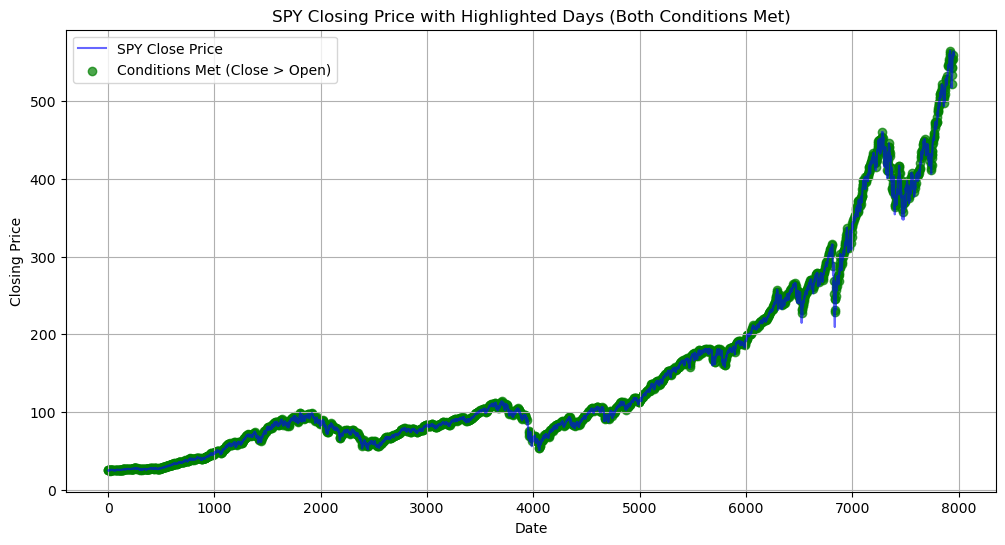

In [26]:
# Step 1: Filter the dataset to include only the days where both conditions are met and SPY closes higher than open
spy['Both_Conditions_Met'] = condition_combined & spy['Close_Higher_Than_Open']

# Step 2: Plot the SPY closing price and highlight the days where both conditions are met
plt.figure(figsize=(12, 6))
plt.plot(spy.index, spy['Close'], label='SPY Close Price', color='blue', alpha=0.6)

# Highlight days where both conditions are met and SPY closes higher than open
plt.scatter(spy.index[spy['Both_Conditions_Met']], spy['Close'][spy['Both_Conditions_Met']], 
            color='green', label='Conditions Met (Close > Open)', alpha=0.7)

plt.title('SPY Closing Price with Highlighted Days (Both Conditions Met)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Step 1: Calculate how many days SPY closes higher than the previous 2, 3, 4, and 5 days
spy['Close_Higher_Than_2_Days'] = (spy['Close'] > spy['Close'].shift(1)) & (spy['Close'] > spy['Close'].shift(2))
spy['Close_Higher_Than_3_Days'] = spy['Close_Higher_Than_2_Days'] & (spy['Close'] > spy['Close'].shift(3))
spy['Close_Higher_Than_4_Days'] = spy['Close_Higher_Than_3_Days'] & (spy['Close'] > spy['Close'].shift(4))
spy['Close_Higher_Than_5_Days'] = spy['Close_Higher_Than_4_Days'] & (spy['Close'] > spy['Close'].shift(5))

# Step 2: Count the number of days for each condition
num_days_2 = spy['Close_Higher_Than_2_Days'].sum()
num_days_3 = spy['Close_Higher_Than_3_Days'].sum()
num_days_4 = spy['Close_Higher_Than_4_Days'].sum()
num_days_5 = spy['Close_Higher_Than_5_Days'].sum()

# Output the results
num_days_2, num_days_3, num_days_4, num_days_5

(3367, 2927, 2654, 2453)

In [28]:
# Step 1: Check how many days SPY closes higher than open on the days it closes higher than the previous 2 days
spy['Close_Higher_Than_Open_On_2_Days_Higher'] = spy['Close_Higher_Than_2_Days'] & spy['Close_Higher_Than_Open']

# Step 2: Count the number of days where SPY closes higher than open
num_days_close_higher_than_open_on_2_days_higher = spy['Close_Higher_Than_Open_On_2_Days_Higher'].sum()

# Output the result
num_days_close_higher_than_open_on_2_days_higher

2843

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Create the binary target variable (1 if Close > Open, else 0)
spy['Outcome'] = (spy['Close'] > spy['Open']).astype(int)

# Step 2: Choose features and target variable
X = spy[['Open', 'High', 'Low', 'Volume']]
y = spy['Outcome']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix

(0.8170961659333752,
 array([[572, 194],
        [ 97, 728]], dtype=int64))

In [64]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Feature Engineering
spy['Range'] = spy['High'] - spy['Low']  # Add the daily range
spy['Prev_Close'] = spy['Close'].shift(1)  # Previous day's close
spy['Prev_Open'] = spy['Open'].shift(1) # next day's open
spy['Prev_Volume'] = spy['Volume'].shift(1) # Previous day's volume
spy['Return'] = (spy['Close'] - spy['Prev_Close']) / spy['Prev_Close']  # Previous day's return

# Fill any missing values from shifting
spy.fillna(0, inplace=True)

# Use these features now: Open, High, Low, Volume, Range, Return
X = spy[['Open', 'High', 'Low', 'Volume', 'Range', 'Return', 'Prev_Close', 'Prev_Volume']]
y = spy['Outcome']

# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
# This allows us to handle imbalanced datasets which SPY is because over time it tends to increase
# SMOTE generates synthetic samples of the minority class to balance the dataset
smote = SMOTE(random_state=42)
# Fit the SMOTE algorithm to data set and resamples x_scaled and y to make both classes balanced
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 4: Split the resampled data into training and testing sets
# split data by 80/20, train on 80% and test on 20%
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Train the logistic regression model with class weights to balance classes
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix

(0.8211284513805522,
 array([[696, 138],
        [160, 672]], dtype=int64))

In [67]:
from sklearn.model_selection import GridSearchCV

# Step 1: Add the day-of-week as a feature (0 for Monday, 4 for Friday, etc.)
spy['Day_of_Week'] = pd.to_datetime(spy['Date']).dt.dayofweek

# Step 2: Use these features, including Day_of_Week, and previously created features
X = spy[['Open', 'High', 'Low', 'Volume', 'Range', 'Return', 'Prev_Close', 'Prev_Volume', 'Day_of_Week']]
y = spy['Outcome']

# Step 3: Feature Scaling
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Set up logistic regression with grid search to tune hyperparameters
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

# Step 6: Train the model with grid search
grid_search.fit(X_train, y_train)

# Best model from grid search
best_log_reg = grid_search.best_estimator_

# Step 7: Make predictions with the best model
y_pred = best_log_reg.predict(X_test)

# Evaluate model performance
accuracy_improved = accuracy_score(y_test, y_pred)
conf_matrix_improved = confusion_matrix(y_test, y_pred)

accuracy_improved, conf_matrix_improved, grid_search.best_params_

(0.8912633563796355,
 array([[678,  88],
        [ 85, 740]], dtype=int64),
 {'C': 100})

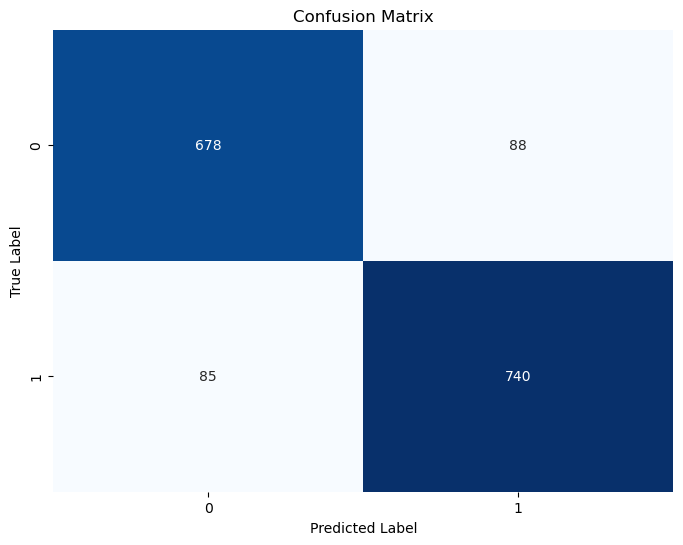

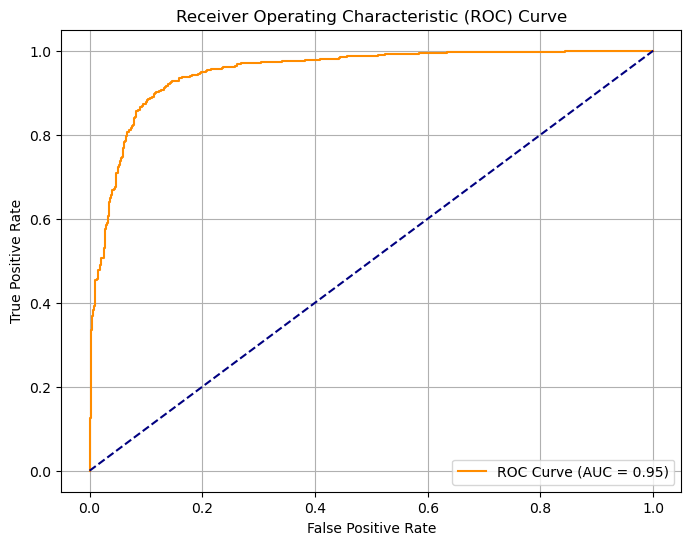

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Step 1: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_improved, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 2: ROC Curve
y_prob = best_log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define the models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    "Grandient Boosting": GradientBoostingClassifier(),
    
}

# Perform 5-fold cross-validation for each model
results = {}
for model_name, model in models.items():
    # Cross-validate the model using accuracy as the metric
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    results[model_name] = np.mean(scores), np.std(scores)
    print(f"{model_name}: Mean Accuracy = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

# Print the summary of results
results


Logistic Regression: Mean Accuracy = 0.8165, Std = 0.0262
Decision Tree: Mean Accuracy = 0.6913, Std = 0.0604
Grandient Boosting: Mean Accuracy = 0.7750, Std = 0.0611


{'Logistic Regression': (0.8165164111017555, 0.02619916289196449),
 'Decision Tree': (0.6912653329064036, 0.060435309164819005),
 'Grandient Boosting': (0.7750097442769668, 0.06106383043666392)}

In [33]:
import numpy as np

# Assuming you have the new day's data for SPY
new_data = {
    'Open': 450.50,  # Example opening price
    'High': 453.00,  # Example high price
    'Low': 449.00,   # Example low price
    'Volume': 75000000,  # Example volume
    'Prev_Close': 448.50  # Previous day's close
}

# Step 1: Preprocess the new data
new_data['Range'] = new_data['High'] - new_data['Low']  # Calculate the range
new_data['Return'] = (new_data['Open'] - new_data['Prev_Close']) / new_data['Prev_Close']  # Calculate return
new_data['Day_of_Week'] = 2  # Example: Tuesday (day_of_week = 2)

# Convert new data into a DataFrame for consistency
new_data_df = pd.DataFrame([new_data])

# Step 2: Scale the new data using the existing scaler
new_data_scaled = scaler.transform(new_data_df[['Open', 'High', 'Low', 'Volume', 'Range', 'Return', 'Day_of_Week']])

# Step 3: Make a prediction using the trained logistic regression model
prediction = best_log_reg.predict(new_data_scaled)
prediction_proba = best_log_reg.predict_proba(new_data_scaled)

# Step 4: Interpret the result
if prediction[0] == 1:
    print(f"The model predicts the SPY close will be higher than the open.")
else:
    print(f"The model predicts the SPY close will be lower than the open.")

print(f"Probability of close > open: {prediction_proba[0][1]:.2f}")
print(f"Probability of close <= open: {prediction_proba[0][0]:.2f}")

The model predicts the SPY close will be higher than the open.
Probability of close > open: 0.87
Probability of close <= open: 0.13


In [34]:
# Define a function to randomly sample values from the dataset and use them in the prediction model
def random_sample_prediction(spy, model, scaler):
    # Step 1: Randomly sample one row from the dataset
    random_sample = spy.sample(1)
    
    # Step 2: Extract features required for the prediction
    random_sample_data = random_sample[['Open', 'High', 'Low', 'Volume', 'Range', 'Return', 'Day_of_Week']]
    
    # Step 3: Scale the features using the existing scaler
    random_sample_scaled = scaler.transform(random_sample_data)
    
    # Step 4: Make a prediction using the trained logistic regression model
    prediction = model.predict(random_sample_scaled)
    prediction_proba = model.predict_proba(random_sample_scaled)
    
    # Step 5: Return the prediction and probabilities
    result = {
        'Sampled Data': random_sample_data,
        'Prediction': 'Close > Open' if prediction[0] == 1 else 'Close <= Open',
        'Probability (Close > Open)': prediction_proba[0][1],
        'Probability (Close <= Open)': prediction_proba[0][0]
    }
    
    return result

# Run the random sampling prediction using the current dataset, trained model, and scaler
random_sample_result = random_sample_prediction(spy, best_log_reg, scaler)
random_sample_result

{'Sampled Data':            Open       High        Low    Volume     Range   Return  \
 2425  58.594418  59.393822  58.303723  41131000  1.090099  0.00246   
 
       Day_of_Week  
 2425            4  ,
 'Prediction': 'Close > Open',
 'Probability (Close > Open)': 0.6794269584437153,
 'Probability (Close <= Open)': 0.32057304155628474}

In [35]:
# Define a function to run multiple random sample predictions and calculate the sampling distribution
def simulation_prediction_distribution(spy, model, scaler, n_samples=30):
    predictions = []
    
    for _ in range(n_samples):
        # Get the prediction result for a random sample
        result = random_sample_prediction(spy, model, scaler)
        # Store the prediction ('Close > Open' or 'Close <= Open')
        predictions.append(result['Prediction'])
    
    # Calculate the distribution of the predictions
    close_greater_than_open = predictions.count('Close > Open') / n_samples
    close_less_than_or_equal_open = predictions.count('Close <= Open') / n_samples
    
    distribution = {
        'Close > Open': close_greater_than_open,
        'Close <= Open': close_less_than_or_equal_open
    }
    
    return distribution

# Run the simulation with 500 random samples
simulation_distribution = simulation_prediction_distribution(spy, best_log_reg, scaler, n_samples=500)
simulation_distribution

{'Close > Open': 0.506, 'Close <= Open': 0.494}

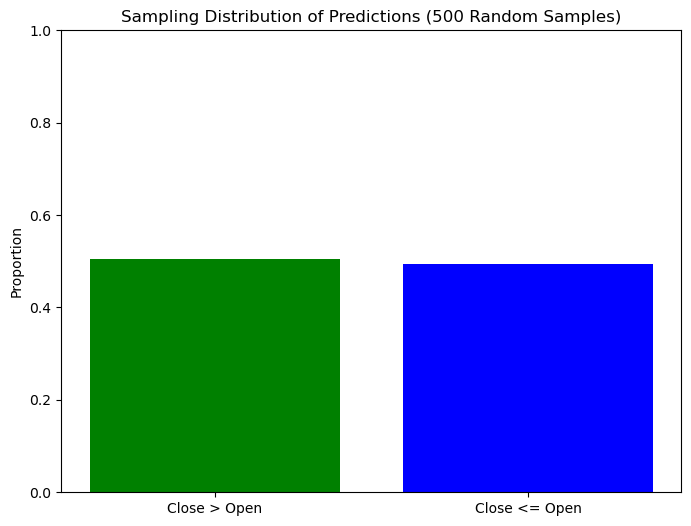

{'Mean (Close > Open)': 0.5,
 'Standard Deviation': 0.006000000000000005,
 'Variance': 3.600000000000006e-05}

In [36]:
# Import necessary library for visualization
import numpy as np

# Visualize the sampling distribution as a bar chart
labels = ['Close > Open', 'Close <= Open']
values = [simulation_distribution['Close > Open'], simulation_distribution['Close <= Open']]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'blue'])
plt.title('Sampling Distribution of Predictions (500 Random Samples)')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.show()

# Generate summary statistics
summary_statistics = {
    'Mean (Close > Open)': np.mean(values),
    'Standard Deviation': np.std(values),
    'Variance': np.var(values)
}

summary_statistics

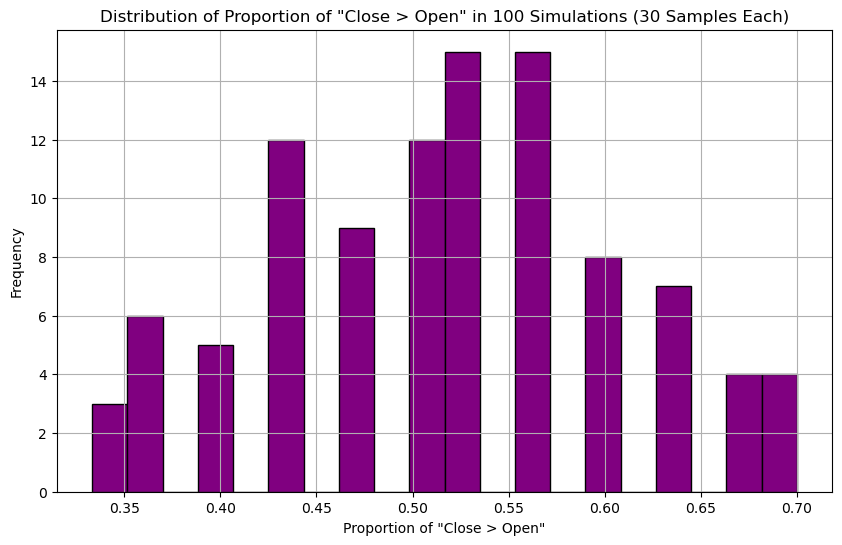

Summary statistics for reduced simulations: {'Mean Proportion (Close > Open)': 0.518, 'Standard Deviation': 0.09109457844582311, 'Variance': 0.00829822222222222}


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming this function is defined
# def random_sample_prediction(spy, model, scaler): ...

# Define a function to run multiple random sample predictions and calculate the sampling distribution
def simulation_prediction_distribution(spy, model, scaler, n_samples=30):
    predictions = []
    
    for _ in range(n_samples):
        # Get the prediction result for a random sample
        result = random_sample_prediction(spy, model, scaler)
        predictions.append(result['Prediction'])
    
    # Calculate the distribution of the predictions
    close_greater_than_open = predictions.count('Close > Open') / n_samples
    close_less_than_or_equal_open = predictions.count('Close <= Open') / n_samples
    
    return {
        'Close > Open': close_greater_than_open,
        'Close <= Open': close_less_than_or_equal_open
    }

# Define the multiple_simulations function
def multiple_simulations(spy, model, scaler, n_simulations=100, n_samples_per_simulation=30):
    simulation_proportions = []
    
    for _ in range(n_simulations):
        # Run a single simulation with n_samples_per_simulation random samples
        distribution = simulation_prediction_distribution(spy, model, scaler, n_samples=n_samples_per_simulation)
        # Store the proportion of 'Close > Open'
        simulation_proportions.append(distribution['Close > Open'])
    
    return simulation_proportions

# Run the simulation with fewer simulations and samples for faster execution
simulation_proportions_reduced = multiple_simulations(spy, best_log_reg, scaler, n_simulations=100, n_samples_per_simulation=30)

# Visualize the distribution of proportions from the 100 simulations
plt.figure(figsize=(10, 6))
plt.hist(simulation_proportions_reduced, bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Proportion of "Close > Open" in 100 Simulations (30 Samples Each)')
plt.xlabel('Proportion of "Close > Open"')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics for the reduced number of simulations
summary_stats_reduced_simulations = {
    'Mean Proportion (Close > Open)': np.mean(simulation_proportions_reduced),
    'Standard Deviation': np.std(simulation_proportions_reduced),
    'Variance': np.var(simulation_proportions_reduced)
}

print(f"Summary statistics for reduced simulations: {summary_stats_reduced_simulations}")